In [1]:
import numpy as np
import pandas as pd

C:\Users\Prave\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("C://Users//Prave//Downloads//spam.csv", encoding='ISO-8859-1')

In [3]:
#df

In [4]:
#1 . data clearning
#2. EDA
#3. text prepossesing
#4. model building
#5. evaluation
#6. improvement
# apply to out data set.

# 1 . data clearning

In [5]:
# Remove the unwanted columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
#df.head()

In [7]:
df.rename(columns={"v1":'target','v2':'text'},inplace=True)

In [8]:
#df.head()

In [9]:
df.shape

(5572, 2)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
#df.head()

In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate
df.duplicated().sum()

403

In [15]:
# remvoe duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2  EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

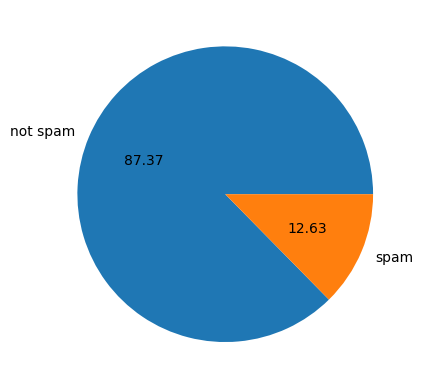

In [20]:
plt.pie(df['target'].value_counts(),labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [21]:
# data is imbalanced

In [22]:
!pip install nltk
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
#df.head()

In [26]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
#df.head()

In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
#df.head()

In [30]:
#summary stats
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#only not spam
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#only not spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
# histogram
import seaborn as sns

C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

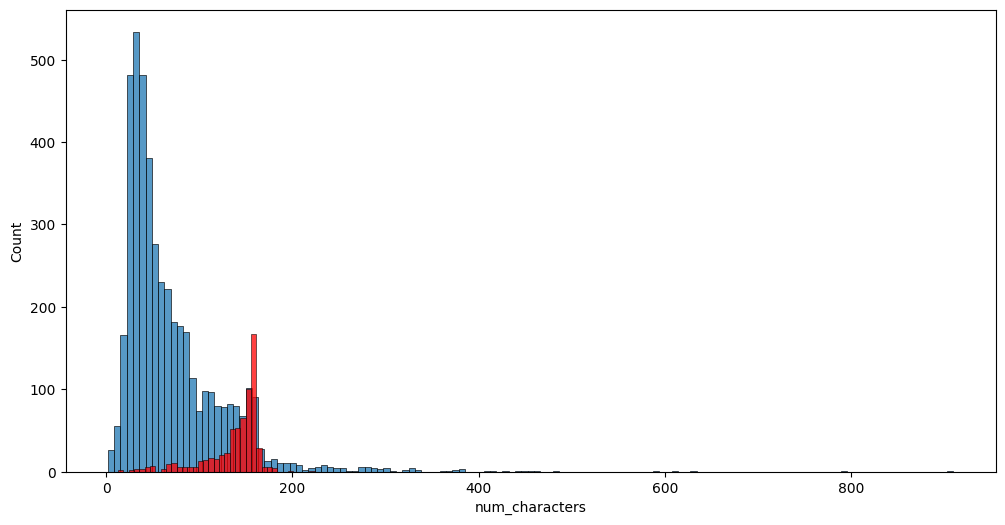

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

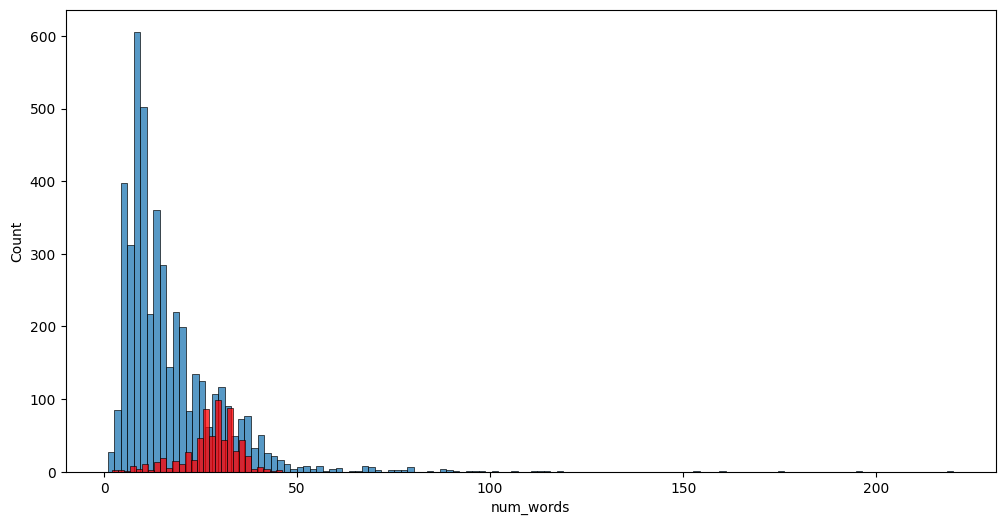

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sentences', ylabel='Count'>

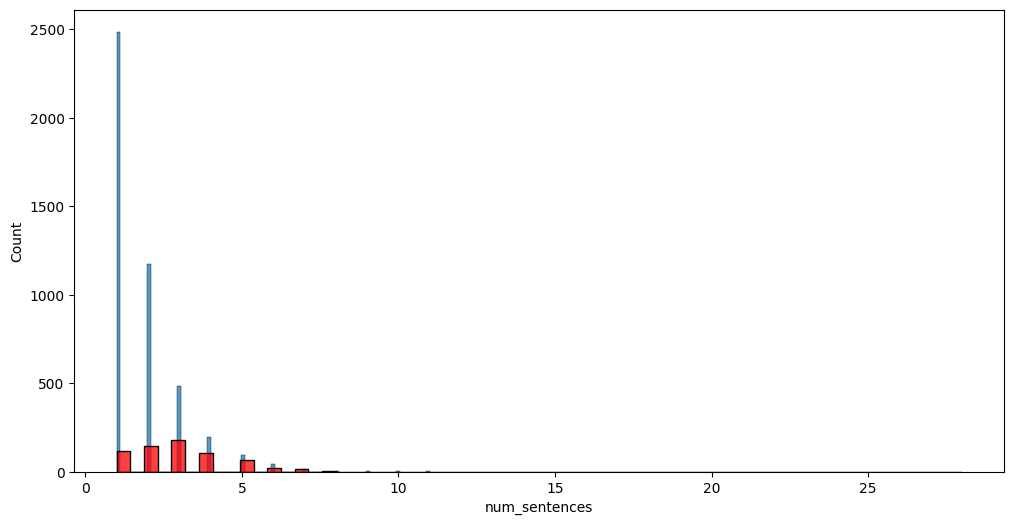

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

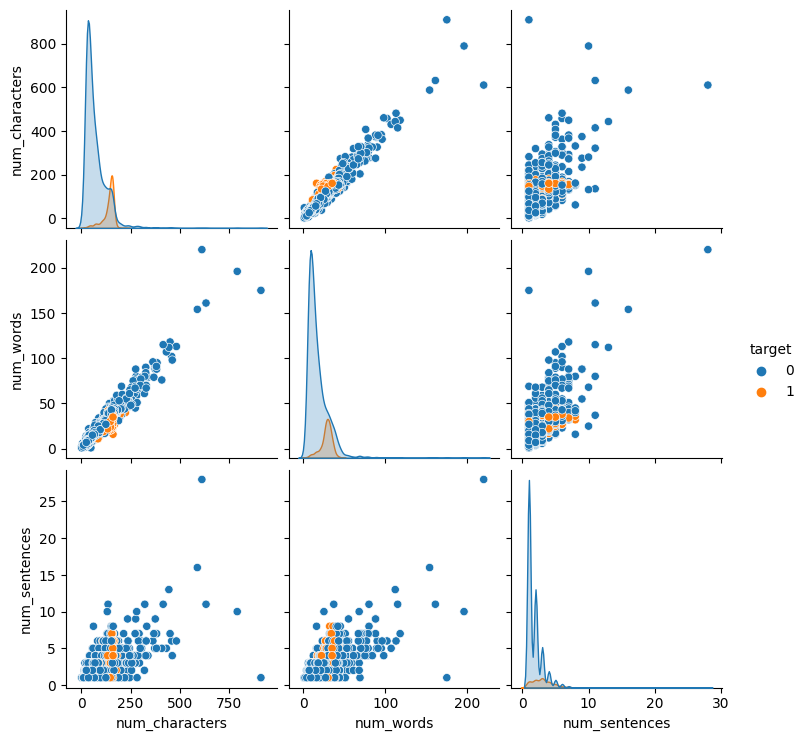

In [37]:
# relation
sns.pairplot(df,hue='target')

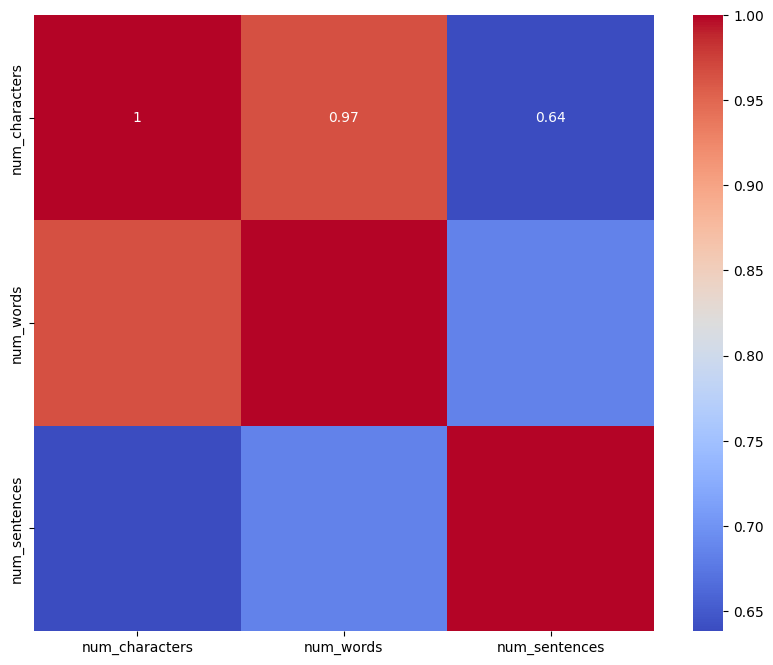

In [38]:
# Compute the correlation matrix, specifying numeric_only
#!pip install --upgrade pandas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

# text preprocessing

In [39]:
#lower case
#Tokenization
#Removing special characters
#removing stop words and punctuations
# stemming

In [40]:
# Download the stopwords resource
nltk.download('stopwords')
from nltk.corpus import stopwords
import string  
stopwords.words('english')
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def transform_text(text):
    # Convert text to lowercase and tokenize
    text = text.lower()
    text = nltk.word_tokenize(text)

    # Use list comprehension to filter out non-alphanumeric words and stopwords
    return [ps.stem(i) for i in text if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation]

In [42]:
transform_text('do your like dancing and singing ?')

['like', 'danc', 'sing']

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [96]:
# Save the transformed dataset using pickle
with open('transformed_data.pkl', 'wb') as file:
    pickle.dump(df, file)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [45]:
!pip install wordcloud

In [46]:
!pip install wordcloud matplotlib
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
# Ensure the 'transformed_text' column has only strings by converting non-string data
#df['transformed_text'] = df['transformed_text'].astype(str)

In [48]:
df.loc[:, 'transformed_text'] = df['transformed_text'].astype(str)
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

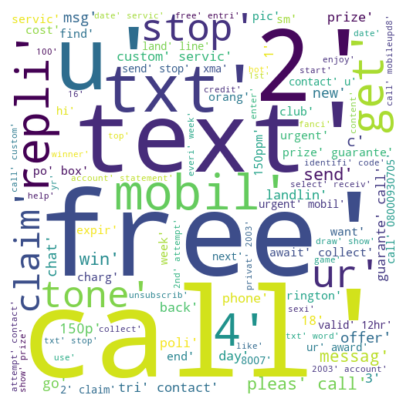

In [49]:
# Plot the word cloud
# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

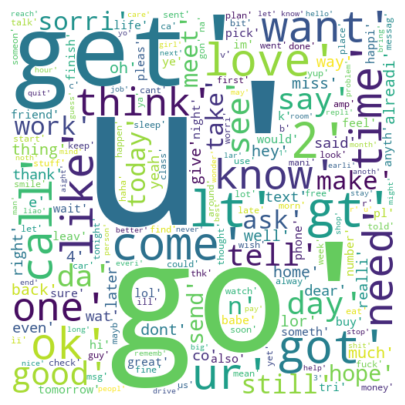

In [51]:
# Plot the word cloud
# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."


In [53]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
from collections import Counter
common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['words','Frequency'])

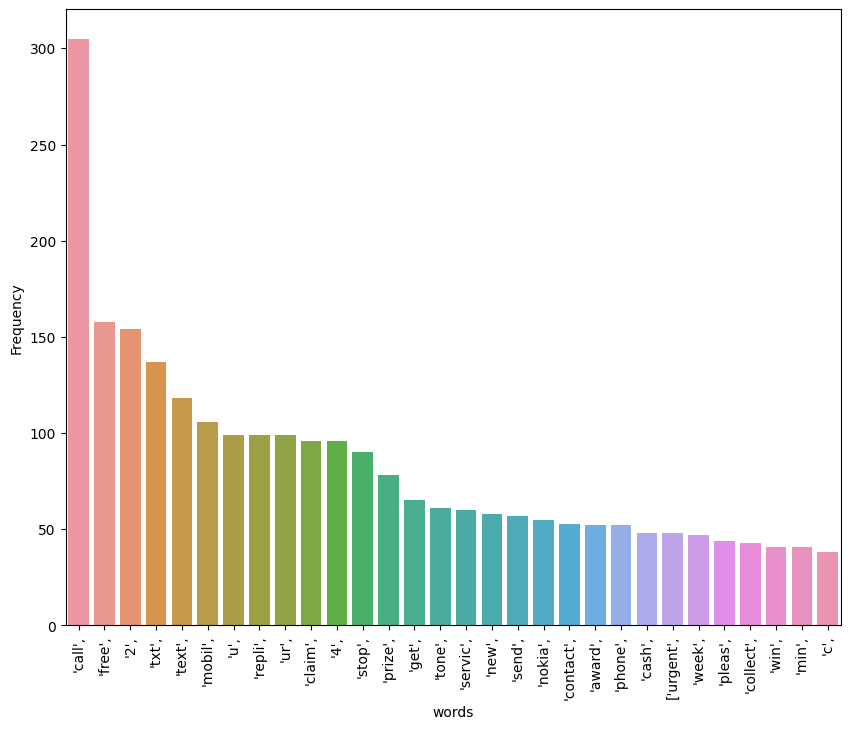

In [55]:
# Plot the barplot using Seaborn
plt.figure(figsize=(10,8))
sns.barplot(x='words', y='Frequency', data=common_words_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [56]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."


In [57]:
#ham_corpus = []
#ham_corpus = df[df['target'] == 0]['transformed_text'].apply(lambda x: ' '.join(x)).tolist()
ham_corpus = [word for msg in df[df['target'] == 0]['transformed_text'].tolist() for word in msg.split()]


In [58]:
print(len(ham_corpus)) 

35403


In [59]:
from collections import Counter
common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['words','Frequency'])

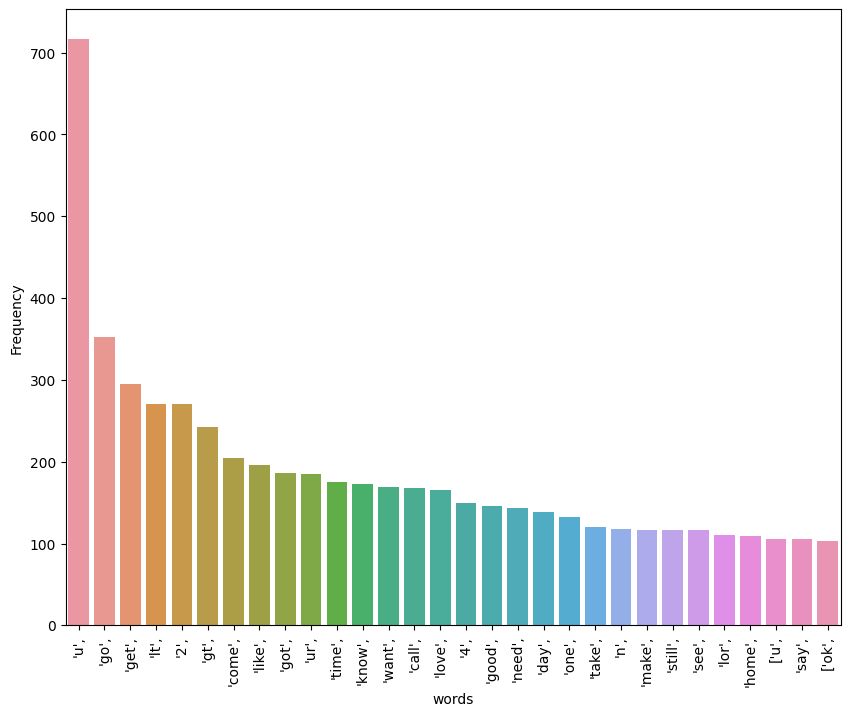

In [60]:
# Plot the barplot using Seaborn
plt.figure(figsize=(10,8))
sns.barplot(x='words', y='Frequency', data=common_words_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Model Building

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."


In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [64]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [65]:
# appending the num of charc col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [66]:
X.shape

(5169, 6708)

In [67]:
y = df['target'].values

In [68]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [74]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [75]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [76]:
# bernouli in performing well

In [77]:
# Tfidf

In [78]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [79]:
# appending the num of charc col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [98]:
# Save the TfidfVectorizer and X_tfidf using pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)
with open('X_tfidf.pkl', 'wb') as file:
    pickle.dump(X, file)

In [80]:
y = df['target'].values

In [99]:
# Save the target variable
with open('target.pkl', 'wb') as file:
    pickle.dump(y, file)

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [83]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [84]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [100]:
# Save models using pickle
with open('gaussian_nb_model.pkl', 'wb') as file:
    pickle.dump(gnb, file)
with open('multinomial_nb_model.pkl', 'wb') as file:
    pickle.dump(mnb, file)
with open('bernoulli_nb_model.pkl', 'wb') as file:
    pickle.dump(bnb, file)

In [101]:
# Save predictions
with open('y_pred_gnb.pkl', 'wb') as file:
    pickle.dump(y_pred_gnb, file)
with open('y_pred_mnb.pkl', 'wb') as file:
    pickle.dump(y_pred_mnb, file)
with open('y_pred_bnb.pkl', 'wb') as file:
    pickle.dump(y_pred_bnb, file)

In [85]:
# mnb peforming well interms of precision with TfIdf

In [86]:
# pipeline creation

In [87]:
# Calculate accuracy scores
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

In [88]:
# Calculate precision scores (set average to 'weighted' for multi-class classification)
precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')
precision_mnb = precision_score(y_test, y_pred_mnb, average='weighted')
precision_bnb = precision_score(y_test, y_pred_bnb, average='weighted')

In [89]:
# Store models with their accuracy and precision
model_results = [
    ("GaussianNB", gnb, accuracy_gnb, precision_gnb),
    ("MultinomialNB", mnb, accuracy_mnb, precision_mnb),
    ("BernoulliNB", bnb, accuracy_bnb, precision_bnb)
]

In [90]:
# Sort models by accuracy and precision
sorted_by_accuracy = sorted(model_results, key=lambda x: x[2], reverse=True)  # Sort by accuracy
sorted_by_precision = sorted(model_results, key=lambda x: x[3], reverse=True)  # Sort by precision


In [91]:
# Get the best model by accuracy and precision
best_model_accuracy = sorted_by_accuracy[0]
best_model_precision = sorted_by_precision[0]

In [92]:
# Print sorted results
print("Models sorted by Accuracy:")
for name, model, accuracy, precision in sorted_by_accuracy:
    print(f"Model: {name}, Accuracy: {accuracy}, Precision: {precision}")

Models sorted by Accuracy:
Model: BernoulliNB, Accuracy: 0.9835589941972921, Precision: 0.9836958370815164
Model: MultinomialNB, Accuracy: 0.9709864603481625, Precision: 0.971926423835803
Model: GaussianNB, Accuracy: 0.8694390715667312, Precision: 0.9054755995131818


In [93]:
print("\nModels sorted by Precision:")
for name, model, accuracy, precision in sorted_by_precision:
    print(f"Model: {name}, Precision: {precision}, Accuracy: {accuracy}")


Models sorted by Precision:
Model: BernoulliNB, Precision: 0.9836958370815164, Accuracy: 0.9835589941972921
Model: MultinomialNB, Precision: 0.971926423835803, Accuracy: 0.9709864603481625
Model: GaussianNB, Precision: 0.9054755995131818, Accuracy: 0.8694390715667312


In [94]:
# Print the best models
print(f"\nBest model by Accuracy: {best_model_accuracy[0]} with Accuracy: {best_model_accuracy[2]}")
print(f"Best model by Precision: {best_model_precision[0]} with Precision: {best_model_precision[3]}")


Best model by Accuracy: BernoulliNB with Accuracy: 0.9835589941972921
Best model by Precision: BernoulliNB with Precision: 0.9836958370815164


In [102]:
# Save model results using pickle
with open('model_results.pkl', 'wb') as file:
    pickle.dump(model_results, file)

# Save sorted results by accuracy
with open('sorted_by_accuracy.pkl', 'wb') as file:
    pickle.dump(sorted_by_accuracy, file)

# Save sorted results by precision
with open('sorted_by_precision.pkl', 'wb') as file:
    pickle.dump(sorted_by_precision, file)

# Save best model by accuracy
with open('best_model_accuracy.pkl', 'wb') as file:
    pickle.dump(best_model_accuracy, file)

# Save best model by precision
with open('best_model_precision.pkl', 'wb') as file:
    pickle.dump(best_model_precision, file)